### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from datetime import datetime
from tqdm import tqdm

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

SRC_PATH = Path(os.getcwd()).parent.joinpath('src')
sys.path.append(str(SRC_PATH))

from ts_utils import plot_seasonality, plot_decomposition, plot_differencing

### Load Data

In [6]:
UPDATE_MARCH = True # TODO: FIX THIS, march data gets duplicated

In [13]:
df_all = pd.read_csv('../data.csv', index_col=0)

if UPDATE_MARCH:
    df_m = pd.read_csv('../march_data.csv')
    df_all = pd.concat([df_all, df_m]).sort_values('date').reset_index(drop=True)
    df_all.to_csv('../data.csv')

df_all['date'] = pd.to_datetime(df_all['date'])
df_all

,date,price
0,2016-08-01,110.821410
1,2016-08-02,109.621591
2,2016-08-03,108.222038
3,2016-08-04,106.463961
4,2016-08-05,105.745287
...,...,...
2419,2023-03-17,183.700000
2420,2023-03-18,184.100000
2421,2023-03-19,184.600000
2422,2023-03-20,185.200000


In [14]:
fig = px.line(df_all, x='date', y='price', title="NSW Fuel Prices")
fig.show()

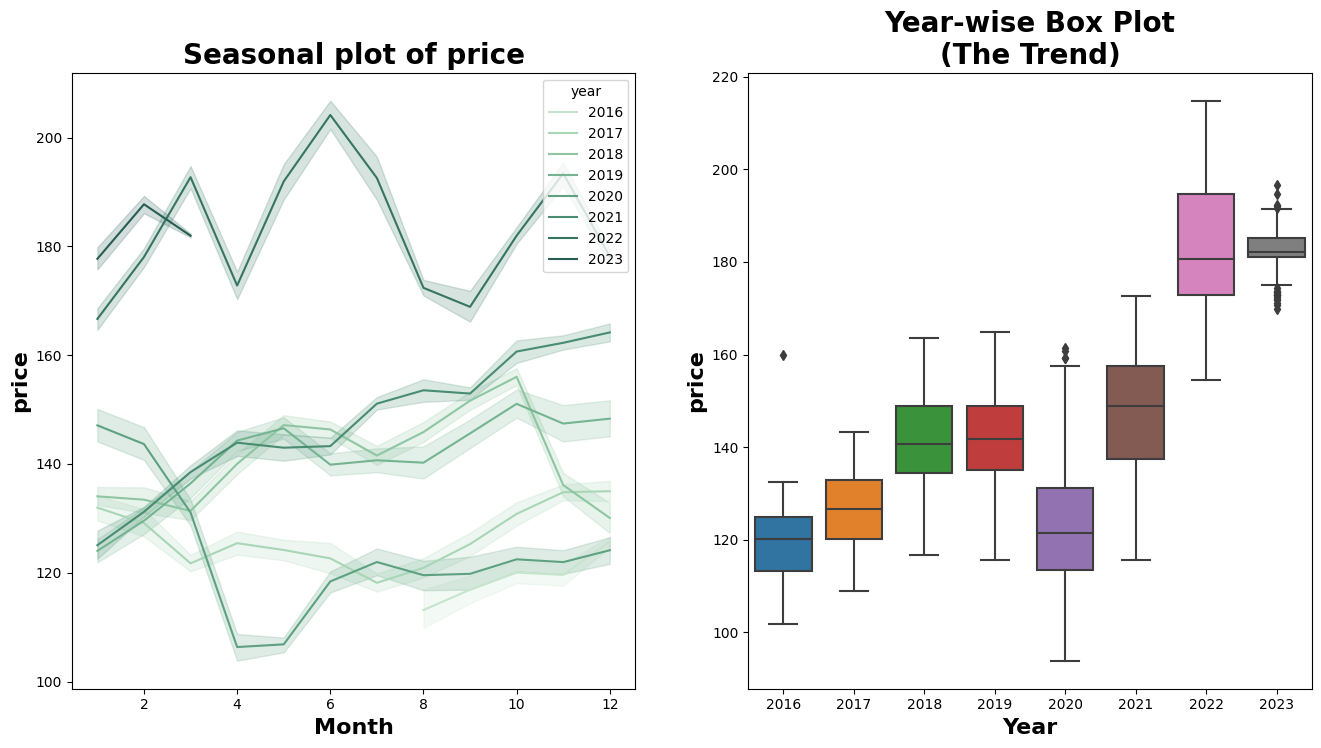

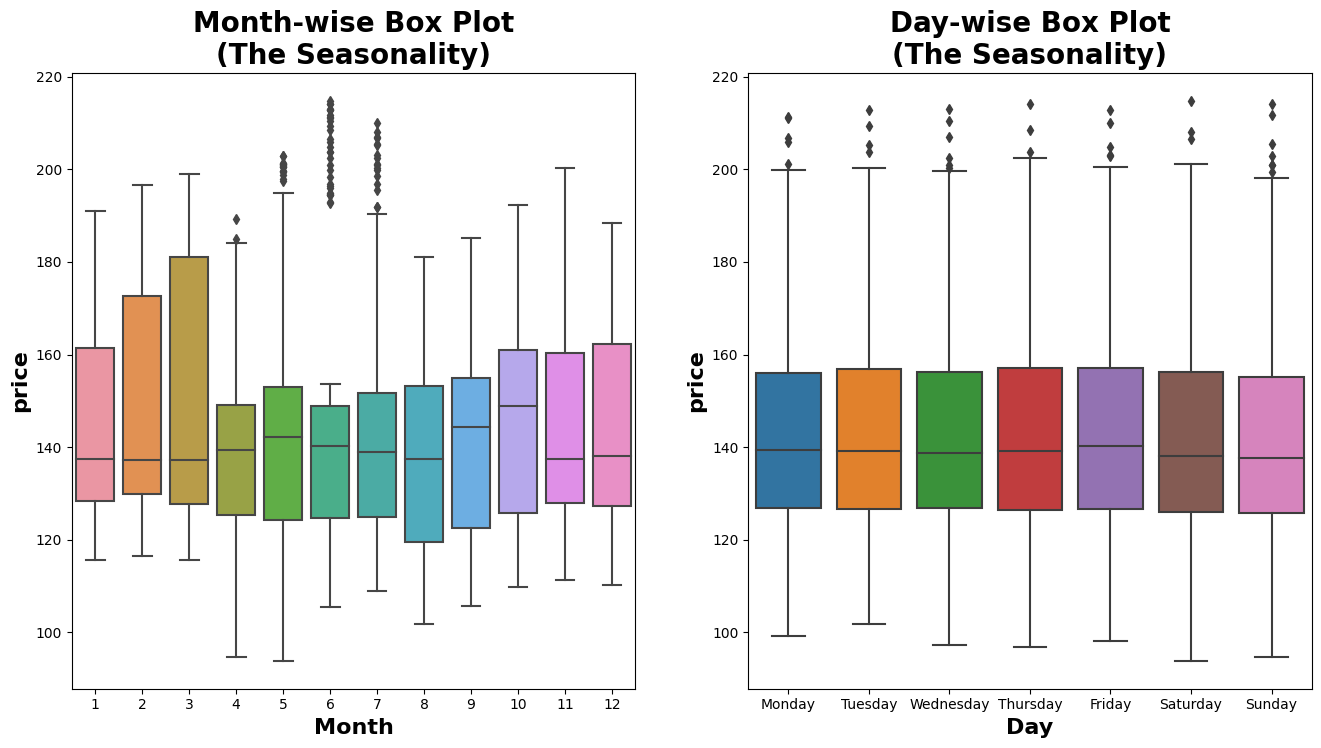

In [50]:
plot_seasonality(df_all, 'price')

- Other than a general trend, it's hard to see any strong seasonal patterns. Probably need to look into exogenous regressors

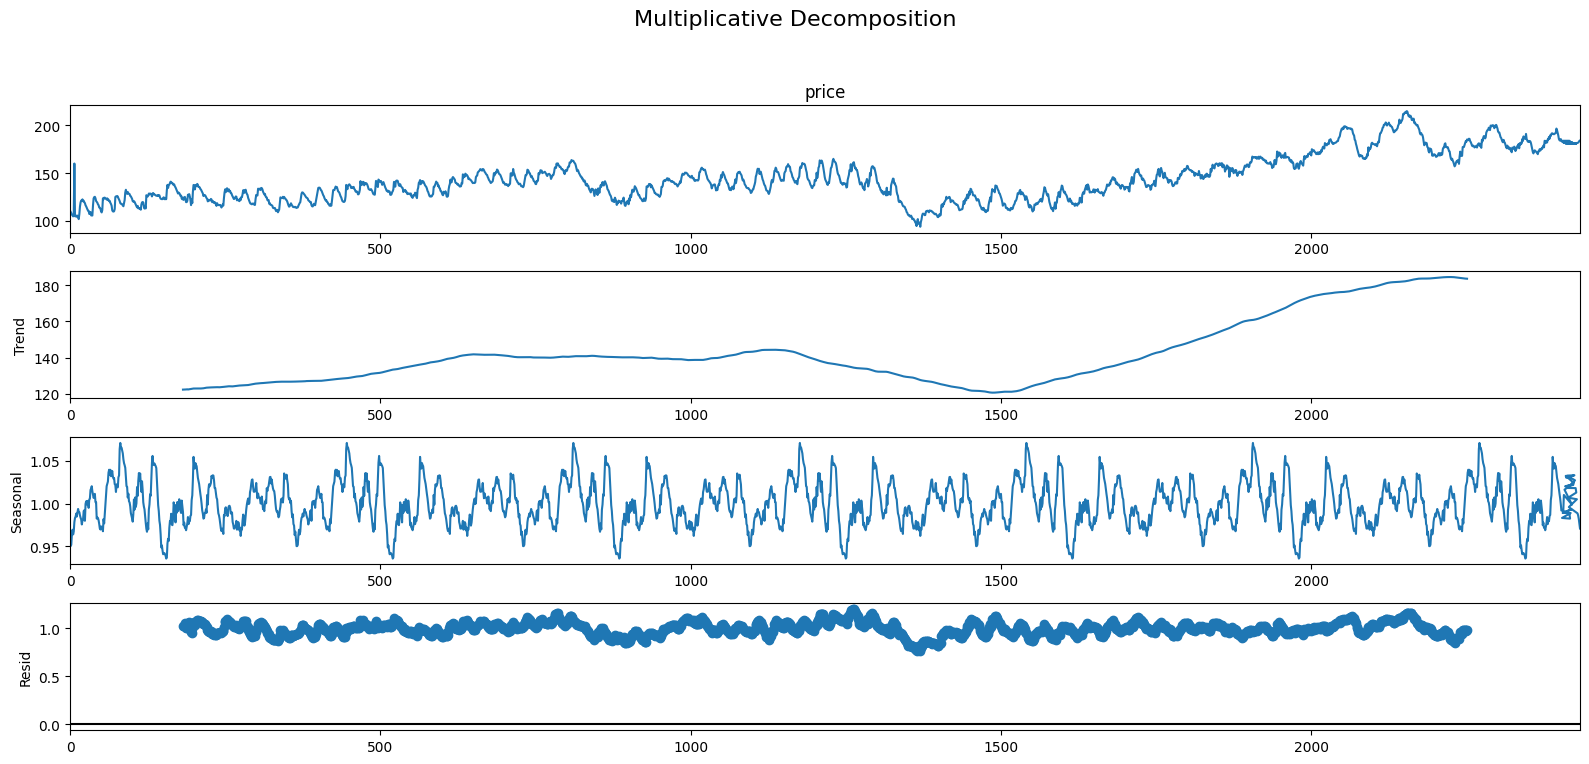

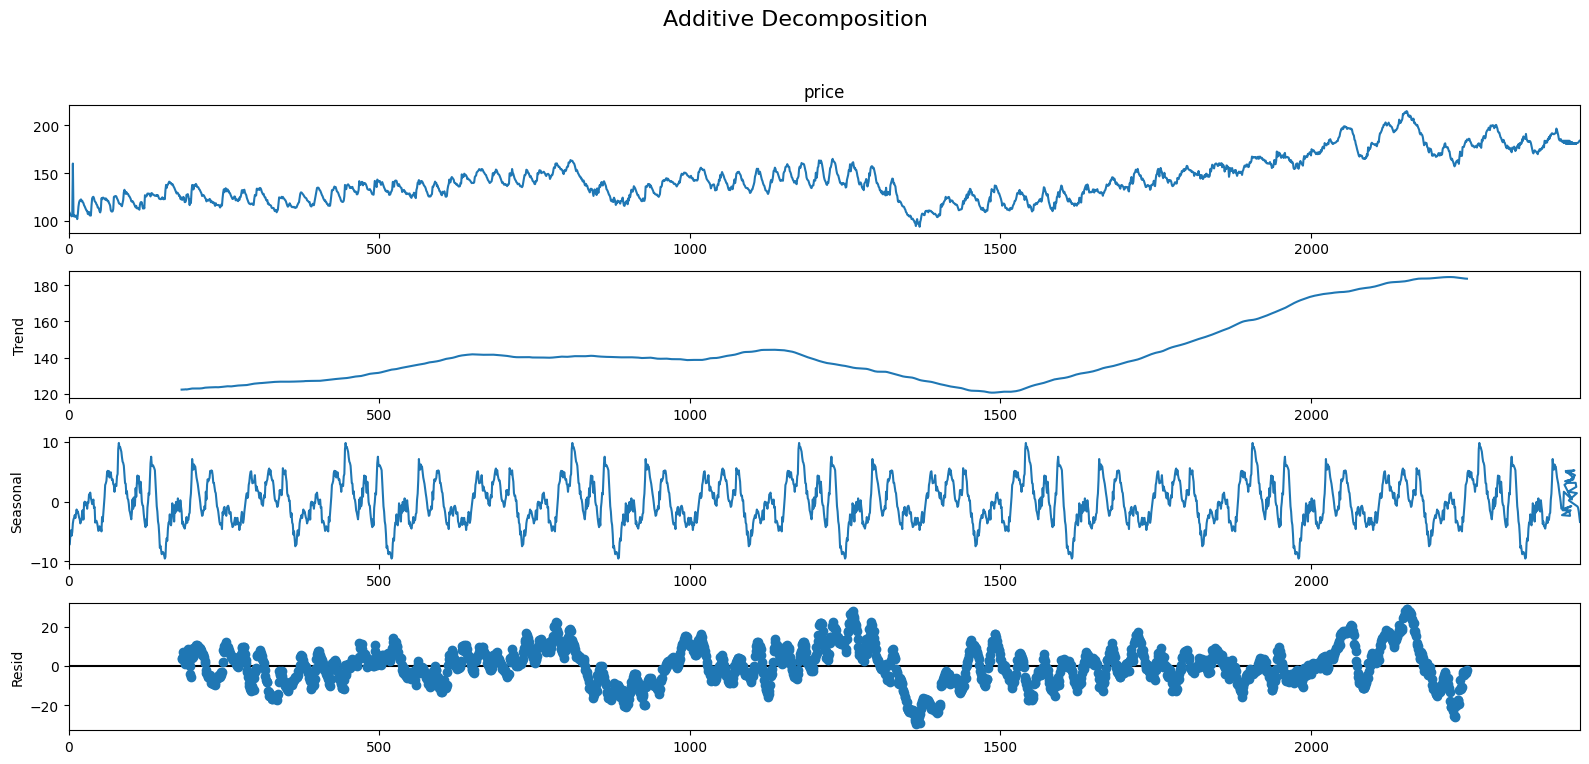

In [51]:
plot_decomposition(df_all, 'price')

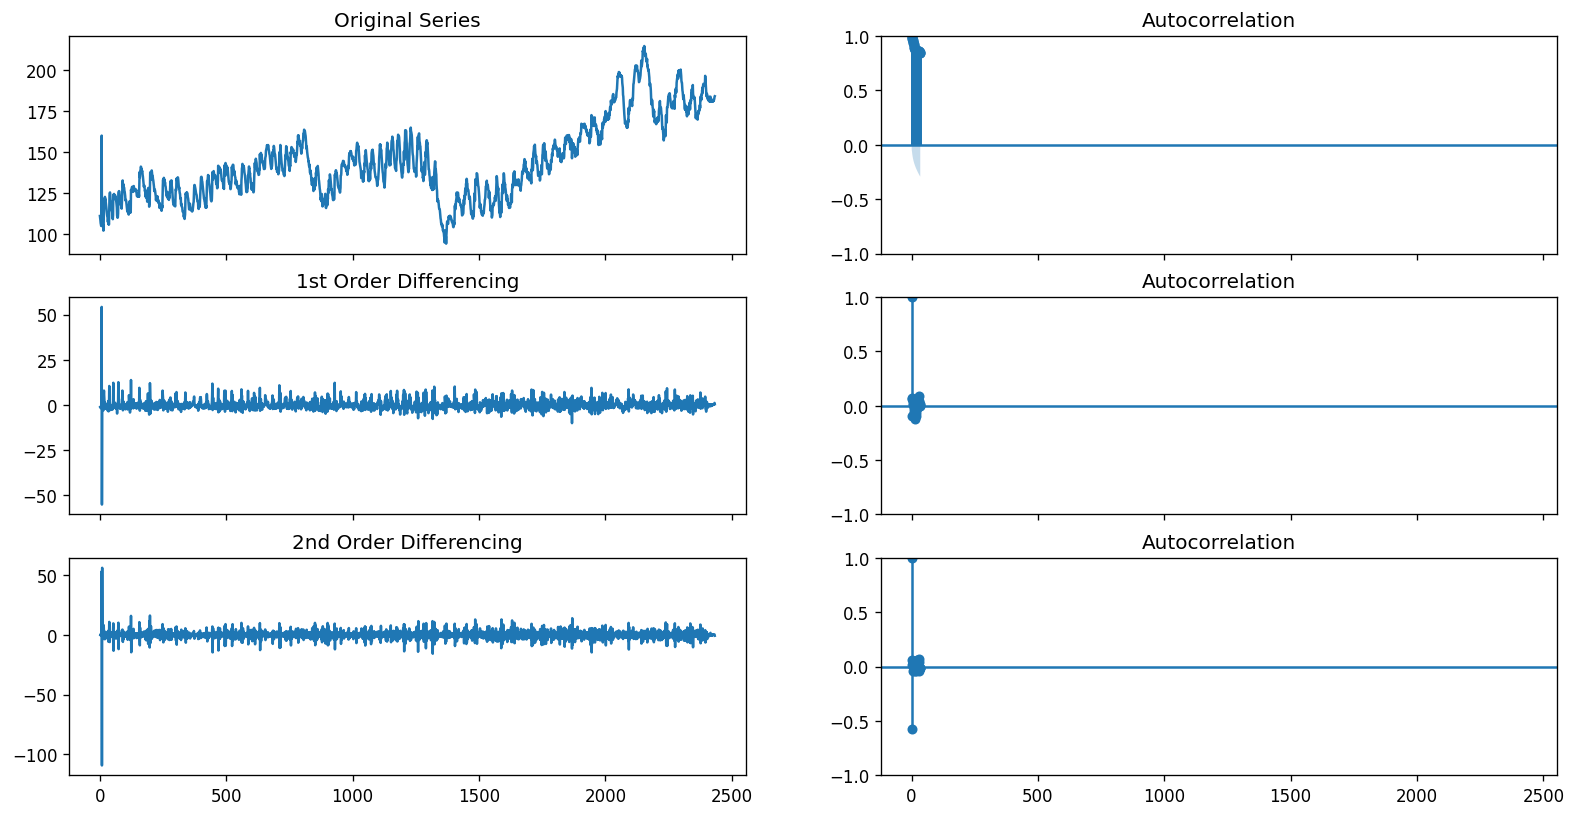

Recommended Differencing:
ADF: 1
KPSS: 1
PP: 0


In [53]:
plot_differencing(df_all, 'price')